In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp



# the next two lines will expand the printed tables
pd.options.display.max_rows= 40000
pd.options.display.max_columns= 40000


ctl_color= "gray"
exp_color="deepskyblue"


In [2]:
READ_METAFILE= pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\FEDXD_METAFILE.xlsx" ,sheet_name="METAFILE" )
len(READ_METAFILE)
READ_METAFILE


,MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET
0,FEDXDF1,F,1,FED001_032923_02.CSV,0,MIX,FF,PR
1,FEDXDF1,F,1,FED001_033023_01.CSV,0,MIX,FR,PR
2,FEDXDF1,F,1,FED001_040923_00.CSV,1,CAS20,FR,PR
3,FEDXDF1,F,1,FED002_040923_00.CSV,1,CAS5,FR,PR
4,FEDXDF1,F,1,FED001_041323_00.CSV,2,CAS20,FR,PR
5,FEDXDF1,F,1,FED002_041323_00.CSV,2,SUC,FR,PR
6,FEDXDF1,F,1,FED001_041723_00.CSV,3,CAS5,FR,PR
7,FEDXDF1,F,1,FED002_041723_00.CSV,3,SUC,FR,PR
8,FEDXDF1,F,1,FED001_042123_03.CSV,4,CAS5,CE,PR
9,FEDXDF1,F,1,FED002_042123_02.CSV,4,SUC,CE,PR


In [3]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED003_041123_00.CSV"))

def tweak_fed(df):
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
             # .loc["2022-09-12 08:00:00":] # cuts off training phase
             .loc[:,"ipi"]
            
           )

            
      
           

In [4]:
DATA_FOLDER = "..\\data"
# df = pd.read_csv(os.path.join(DATA_FOLDER)

def tweak_fed(df):
    return (df
             .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
             .assign(t=lambda df_: pd.to_datetime(df_.t))
             .set_index("t")
             .query("Event == 'Pellet'")
             # .loc["2022-09-12 08:00:00":] # cuts off training phase
             .loc[:,"ipi"]
            
           )

            

In [80]:
# METAFILE = "..\\FEDXD_METAFILE.xls"
# rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

# ff_dict = {}
# for row in rows:
#     # file, mouse, diet, mode, sex,order,epoch = row
#     MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET = row
#     if (MODE == "FR") and (DIET in ["NR", "PR"] and FED_PELLET in ["MIX","CAS5","CAS20","SUC"] and MODE in ["FF","FR","CE"]):
#         key = "_".join([MOUSEID,DIET,FED_PELLET,MODE])
#         ff_dict[key] = {}
#         ff_dict[key]["MOUSEID"] = MOUSEID
#         ff_dict[key]["DIET"] = DIET
#         ff_dict[key]["SEX"] = SEX
#         ff_dict[key]["MODE"] = MODE
#         ff_dict[key]["CHOICE_SESSION"] = CHOICE_SESSION
#         ff_dict[key][BATCH]= BATCH
#         ff_dict[FED_PELLET]= FED_PELLET
#         ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, FEDFILE)))

In [5]:
METAFILE = "..\\FEDXD_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE_SE")

ff_dict = {}
for row in rows:
    # file, mouse, diet, mode, sex,order,epoch = row
    MOUSEID,SEX,BATCH,FEDFILE,CHOICE_SESSION,FED_PELLET,MODE,DIET = row
    if (MODE == "FF" or "FR" or "CE") and (DIET in ["NR", "PR"] and FED_PELLET in ["MIX","CAS5","CAS20","SUC"] and CHOICE_SESSION in["ZERO","ONE","TWO","THREE","FOUR"] ):
        key = "_".join([MOUSEID,DIET,FED_PELLET,MODE,CHOICE_SESSION])
        ff_dict[key] = {}
        ff_dict[key]["MOUSEID"] = MOUSEID
        ff_dict[key]["DIET"] = DIET
        ff_dict[key]["SEX"] = SEX
        ff_dict[key]["MODE"] = MODE
        ff_dict[key]["CHOICE_SESSION"] = CHOICE_SESSION
        ff_dict[key][BATCH]= int(BATCH)
        ff_dict[FED_PELLET]= FED_PELLET
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, FEDFILE)))

File is excel file. Making csv metafile first


In [7]:
CHOICE1=ff_dict["FEDXDF1_PR_CAS20_FR_ONE"]["pellets"].head(20)
CHOICE2=ff_dict["FEDXDF1_PR_CAS5_FR_ONE"]["pellets"].head(20)

In [8]:
print(CHOICE1)

t
2023-04-09 09:20:12       NaN
2023-04-09 09:21:09      57.0
2023-04-09 09:34:31     802.0
2023-04-09 10:02:16    1665.0
2023-04-09 10:04:10     114.0
2023-04-09 10:34:45    1835.0
2023-04-09 10:41:01     376.0
2023-04-09 10:50:03     542.0
2023-04-09 10:53:41     217.0
2023-04-09 10:57:40     240.0
2023-04-09 11:04:54     434.0
2023-04-09 11:13:56     542.0
2023-04-09 11:14:34      38.0
2023-04-09 11:26:48     734.0
2023-04-09 11:30:20     212.0
2023-04-09 11:37:50     450.0
2023-04-09 11:51:58     848.0
2023-04-09 11:53:54     116.0
2023-04-09 14:04:08    7814.0
2023-04-09 14:06:13     125.0
Name: ipi, dtype: float64


In [9]:
print(CHOICE2)

t
2023-04-09 09:19:35        NaN
2023-04-09 09:24:41      306.0
2023-04-09 09:38:58      857.0
2023-04-09 10:08:29     1771.0
2023-04-09 10:08:50       21.0
2023-04-09 10:27:07     1097.0
2023-04-09 10:27:35       28.0
2023-04-09 10:37:46      611.0
2023-04-09 11:00:53     1387.0
2023-04-09 11:15:44      891.0
2023-04-09 11:22:06      382.0
2023-04-09 11:41:33     1167.0
2023-04-09 11:53:11      698.0
2023-04-09 11:55:53      162.0
2023-04-09 11:58:57      184.0
2023-04-09 14:03:40     7483.0
2023-04-09 14:17:51      851.0
2023-04-09 17:38:40    12049.0
2023-04-09 19:22:57     6257.0
2023-04-09 20:14:43     3106.0
Name: ipi, dtype: float64


In [382]:
mice=[]
for key in ff_dict.keys():
    
    mouse= key.split("_")[0]
    if mouse not in mice:
        mice.append(mouse)

In [383]:
mice

['FEDXDF1',
 'MIX',
 'CAS20',
 'CAS5',
 'SUC',
 'FEDXDF2',
 'FEDXDF3',
 'FEDXDF4',
 'FEDXDF5',
 'FEDXDF6',
 'FEDXDF7',
 'FEDXDF8',
 'FEDXDF9',
 'FEDXDF10',
 'FEDXDF11',
 'FEDXDF12',
 'FEDXDF13',
 'FEDXDF14',
 'FEDXDF15',
 'FEDXDF16',
 'FEDXDF17',
 'FEDXDF18',
 'FEDXDF19',
 'FEDXDF20',
 'FEDXDM1',
 'FEDXDM2',
 'FEDXDM3',
 'FEDXDM4',
 'FEDXDM5',
 'FEDXDM6',
 'FEDXDM7',
 'FEDXDM8',
 'FEDXDM9',
 'FEDXDM10',
 'FEDXDM11',
 'FEDXDM12',
 'FEDXDM13',
 'FEDXDM14',
 'FEDXDM15',
 'FEDXDM16',
 'FEDXDM17',
 'FEDXDM18',
 'FEDXDM19',
 'FEDXDM20']

In [384]:
ff_dict_all_epochs={}
for mouse in mice:
    ff_dict_all_epochs[mouse]={}
    temp=[]
    for key, val in ff_dict.items():
        if mouse in key:
            temp.append(val["pellets"])
            ff_dict_all_epochs [mouse]["CHOICE_SESSION"]= val["CHOICE_SESSION"]
            
    ff_dict_all_epochs[mouse]["pellets"]=pd.concat(temp)       

TypeError: string indices must be integers

In [3]:
BW_DF=pd.read_excel(r"C:\Users\hta031\Github\FEDPROFERENCE\results\FEDXD_CHOICE_RESULTS_OVERALL.xlsx", sheet_name="BODYWEIGHT")

In [5]:
BW_DF.round(decimals=2)

,Mouse,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,BW measuremnt times,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12,AV,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,NaN,19.60,19.00,19.70,20.50,20.70,20.40,20.50,21.50,19.90,21.30,22.50,23.30,22.5,20.31,NaN,NaN,NaN
3,F2,NaN,19.30,19.70,20.60,20.80,20.20,20.40,20.40,21.10,19.20,21.00,21.90,22.70,21.3,20.27,NaN,NaN,NaN
4,F3,NaN,20.40,20.40,21.30,20.90,21.40,20.90,21.80,21.50,19.60,22.70,22.40,22.70,22.8,21.09,NaN,NaN,NaN
5,F4,NaN,20.30,20.10,20.70,20.90,20.60,20.50,20.40,21.30,20.40,21.30,21.90,22.40,21.4,20.65,NaN,NaN,NaN
6,F5,NaN,20.20,19.80,20.00,20.60,20.60,21.10,21.00,21.80,19.40,22.30,22.20,22.50,22.5,20.68,NaN,NaN,NaN
7,F6,NaN,20.10,19.00,20.20,21.10,21.40,21.20,21.30,22.00,22.10,22.00,22.80,23.40,22.1,21.04,NaN,NaN,NaN
8,F7,NaN,18.30,18.30,19.20,19.90,19.90,19.40,19.40,20.50,19.80,20.60,20.60,21.10,20.8,19.53,NaN,NaN,NaN
9,F8,NaN,18.50,18.10,18.90,19.20,19.70,19.50,19.90,20.20,20.40,21.10,21.90,21.40,21.4,19.55,NaN,NaN,NaN


In [6]:
#gets the first 10 measurments of bodyweight for all mice in control and experimental group, male and female
ctl_M=BW_DF.iloc[45:55, 0:13] 
exp_M=BW_DF.iloc[12:22, 0:13]
ctl_F=BW_DF.iloc[35:45, 0:13] 
exp_F=BW_DF.iloc[2:12, 0:13]

ctl_F_B1=BW_DF.iloc[35:40, 2:11] 
exp_F_B1=BW_DF.iloc[2:7, 2:11]

ctl_F_B2=BW_DF.iloc[40:45, 2:11] 
exp_F_B2=BW_DF.iloc[7:12, 2:11]

ctl_M_B3=BW_DF.iloc[45:50, 2:11] 
exp_M_B3=BW_DF.iloc[12:17, 2:11]

ctl_M_B4=BW_DF.iloc[50:55, 2:11] 
exp_M_B4=BW_DF.iloc[17:22, 2:11]

Text(0.5, 1.0, 'B4')

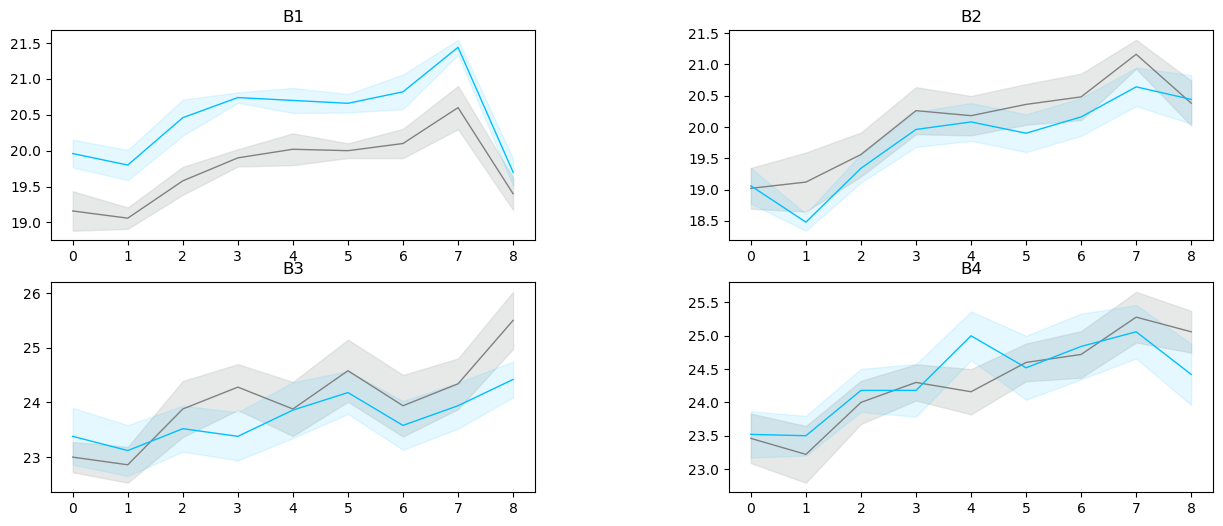

In [7]:
f, axes = plt.subplots(figsize=(15,6), ncols=2,nrows=2,
                            sharey=False,
                            gridspec_kw={"width_ratios":[0.7,0.7],
                                        "right":0.9, 
                                        "wspace":0.4,
                                        })
ax1, ax2, ax3, ax4 = axes.flatten()
tp.shadedError(ax1,ctl_F_B1,linecolor=ctl_color)
tp.shadedError(ax1,exp_F_B1,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax1.set_title("B1")

tp.shadedError(ax2,ctl_F_B2,linecolor=ctl_color)
tp.shadedError(ax2,exp_F_B2,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax2.set_title("B2")

tp.shadedError(ax3,ctl_M_B3,linecolor=ctl_color)
tp.shadedError(ax3,exp_M_B3,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax3.set_title("B3")

tp.shadedError(ax4,ctl_M_B4,linecolor=ctl_color)
tp.shadedError(ax4,exp_M_B4,linecolor=exp_color, errorcolor= exp_color, alpha= 0.1, linewidth=1)
ax4.set_title("B4")
# spacing=0.05
# ax2.errorbar([1-spacing],[ctl.mean()],
#              yerr=[ctl.sem()],
#             marker="o",
#             markerfacecolor="white",
#              ms=8,
#             linestyle="-",
#             color=ctl_color,
#              label="Ctl",
             
#             )

# ax2.errorbar([1+spacing,2+spacing,3+spacing],[exp.mean()],
#              yerr=[exp.sem()],
#             marker="o",
#              markerfacecolor="white",
#              ms=8,
#             linestyle="-",
#             color=exp_color,
#             label="Exp")